# Global Power-Plants Prediction

Project Description 
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available

In [129]:
# Importing some libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [139]:
df1 = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df1

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [141]:
df1.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

# Data Cleaning 

In [142]:
columns_to_drop = ['country','country_long','gppd_idnr', 'name', 'commissioning_year', 'other_fuel1', 'other_fuel2', 'other_fuel3','owner', 'url', 'wepp_id', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','generation_data_source']
df1.drop(columns=columns_to_drop, inplace=True)

In [143]:
df1.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'source',
       'geolocation_source', 'year_of_capacity_data', 'generation_gwh_2013',
       'generation_gwh_2019', 'estimated_generation_gwh'],
      dtype='object')

In [144]:
df1.drop('generation_gwh_2013', axis=1, inplace=True)
df1.drop('generation_gwh_2019', axis=1, inplace=True)
df1.drop('source', axis=1, inplace=True)
df1.drop('geolocation_source', axis=1, inplace=True)
df1.drop('year_of_capacity_data', axis=1, inplace=True)

In [145]:
df1.isnull().sum()

capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
estimated_generation_gwh    907
dtype: int64

In [146]:
# Calculate the mean values for 'latitude' and 'longitude'
latitude_mean = df1['latitude'].mean()
longitude_mean = df1['longitude'].mean()

# Fill null values with the mean values
df1['latitude'].fillna(latitude_mean, inplace=True)
df1['longitude'].fillna(longitude_mean, inplace=True)

In [147]:
df1.describe()

,capacity_mw,latitude,longitude,estimated_generation_gwh
count,907.000000,907.000000,907.000000,0.0
mean,326.223755,21.197918,77.464907,NaN
std,590.085456,6.079148,4.812291,NaN
min,0.000000,8.168900,68.644700,NaN
25%,16.725000,17.072000,74.388900,NaN
50%,59.200000,21.281800,76.979200,NaN
75%,385.250000,25.176450,79.206100,NaN
max,4760.000000,34.649000,95.408000,NaN


In [148]:
df1.head()

,capacity_mw,latitude,longitude,primary_fuel,estimated_generation_gwh
0,2.5,28.1839,73.2407,Solar,NaN
1,98.0,24.7663,74.6090,Coal,NaN
2,39.2,21.9038,69.3732,Wind,NaN
3,135.0,23.8712,91.3602,Gas,NaN
4,1800.0,21.9603,82.4091,Coal,NaN


In [149]:
df1.shape

(907, 5)

# Visualizations

In [150]:
df1['primary_fuel'].value_counts().sort_values()

Nuclear      9
Oil         20
Biomass     50
Gas         69
Wind       123
Solar      127
Hydro      251
Coal       258
Name: primary_fuel, dtype: int64

<Axes: >

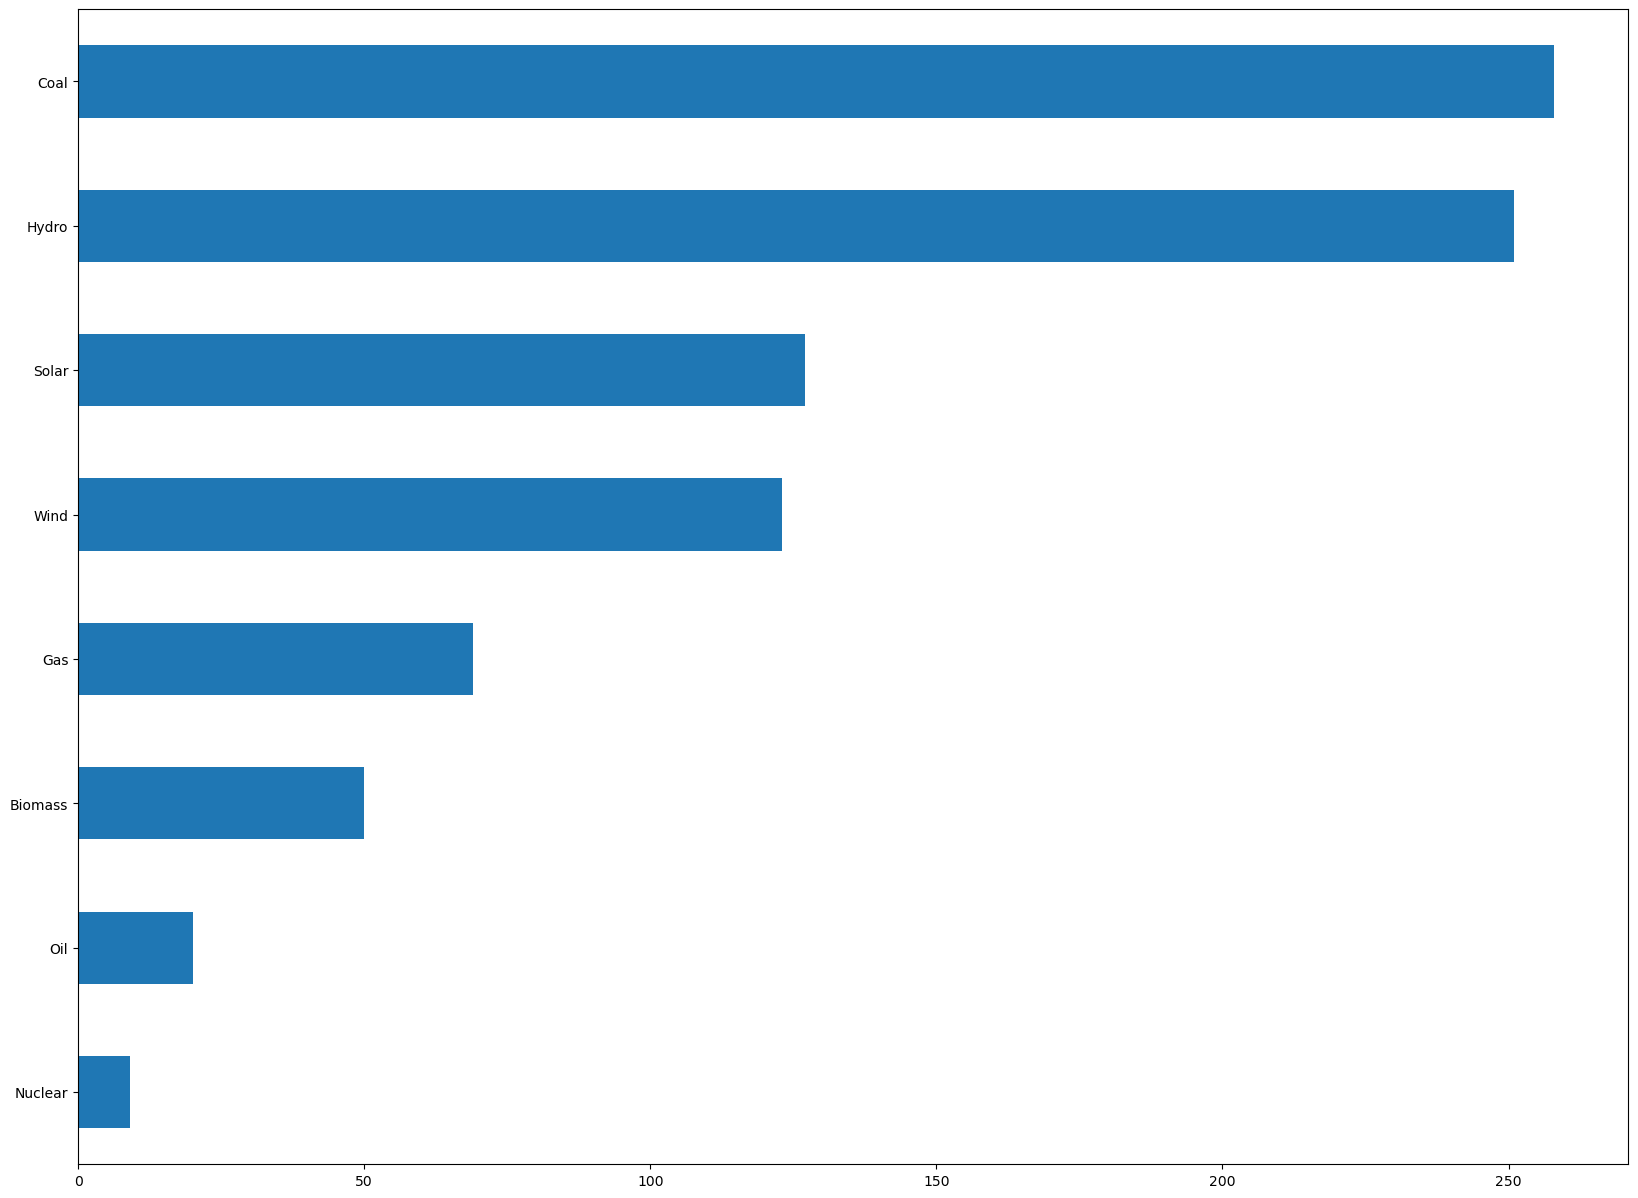

In [19]:
df1['primary_fuel'].value_counts().head(35).sort_values().plot.barh(figsize=(20,15))

NameError: name 'primary_fuel' is not defined

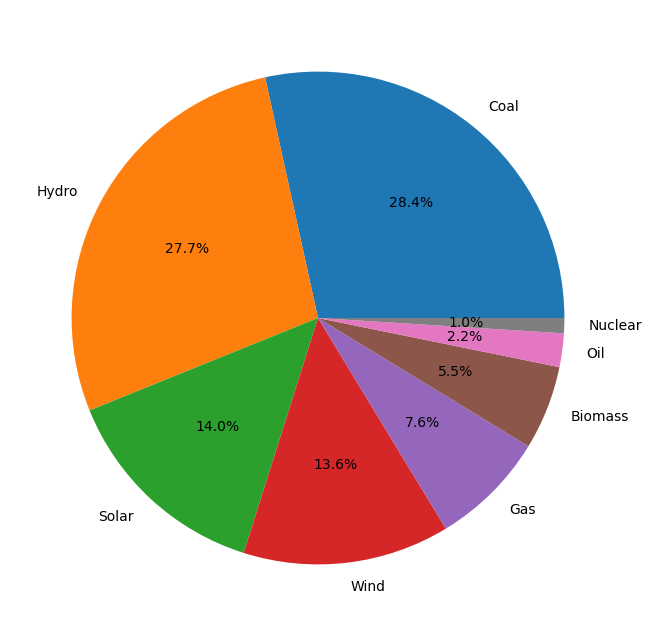

In [151]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column you want to visualize
data = df1['primary_fuel'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title(f'Pie Chart for {primary_fuel}')
plt.show()

Comments:
Coal has the highest value of usage(28.4%), follow by Hydro(27.7%) with least seen in Oil(2.2%)

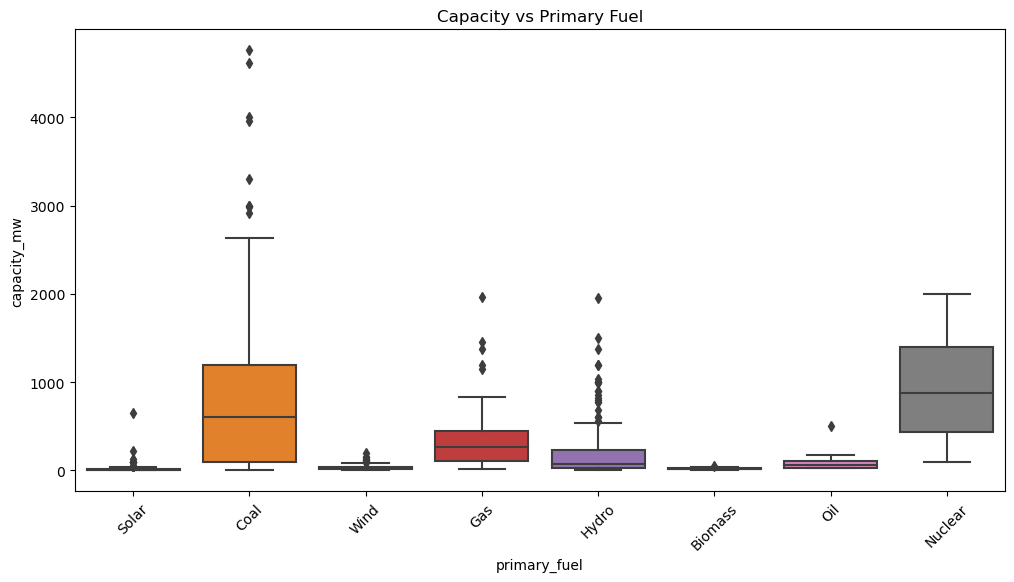

In [21]:
# create a box plot that shows the distribution of 'capacity_mw' for each category of 'primary_fuel'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='primary_fuel', y='capacity_mw')
plt.title('Capacity vs Primary Fuel')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

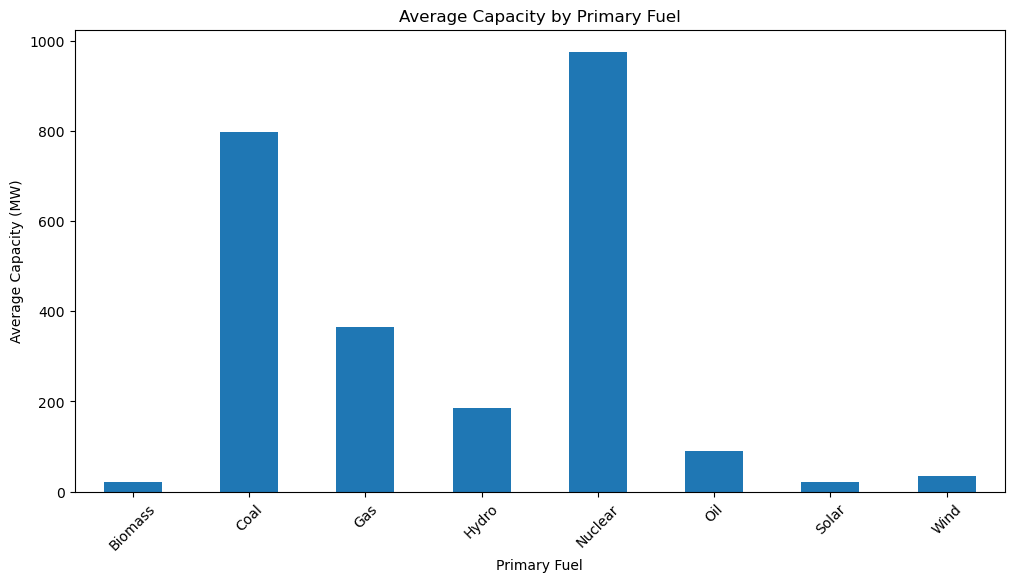

In [22]:
plt.figure(figsize=(12, 6))
df1_grouped = df1.groupby('primary_fuel')['capacity_mw'].mean()
df1_grouped.plot(kind='bar')
plt.title('Average Capacity by Primary Fuel')
plt.xlabel('Primary Fuel')
plt.ylabel('Average Capacity (MW)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

Cooments:
Nuclear primary fuel type has the highest avaerage capacity (MW) and follow by Coal, while the least is Biomass & solar

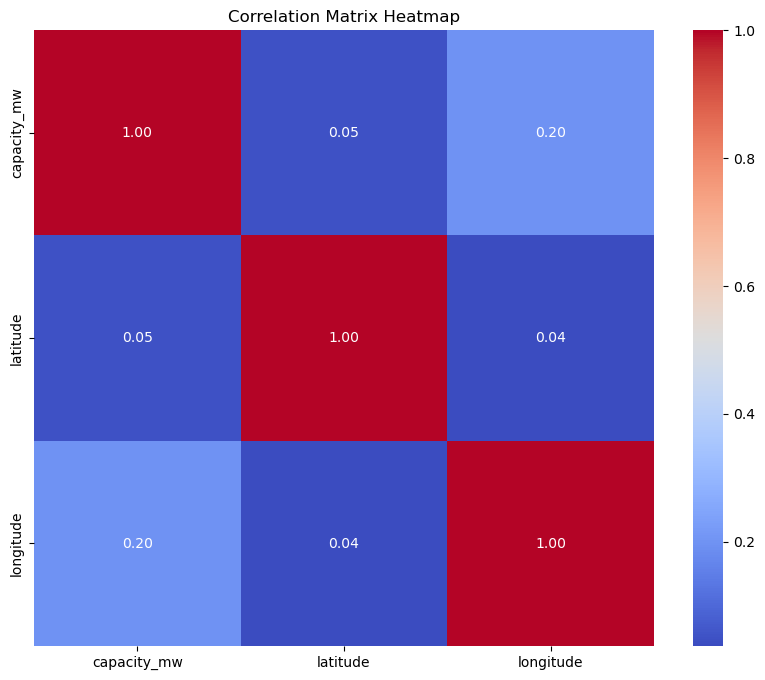

In [23]:
correlation_matrix = df1.corr()

# Create a heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Building Model

In [37]:
# Split the data into features (X) and the target variable (y)
x = df2.drop(['primary_fuel'], axis=1)
y = df2['primary_fuel']

In [38]:
#Copy the df1 dataframe
df2 = df1.copy()

In [39]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'primary_fuel' column
df2['primary_fuel_encoded'] = label_encoder.fit_transform(df2['primary_fuel']) + 1

In [40]:
df2.head()

,capacity_mw,latitude,longitude,primary_fuel,primary_fuel_encoded
0,2.5,28.1839,73.2407,Solar,7
1,98.0,24.7663,74.6090,Coal,2
2,39.2,21.9038,69.3732,Wind,8
3,135.0,23.8712,91.3602,Gas,3
4,1800.0,21.9603,82.4091,Coal,2


In [30]:
X=df2[["capacity_mw","latitude","longitude"]] #feature columns
y=df2.primary_fuel_encoded #predictor variable

In [41]:
#Spliting the train dataset into train and test 80/20
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

print("X Train Shape ",x_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",x_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (634, 4)
Y Train Shape  (634,)
X Test Shape  (273, 4)
Y Test Shape  (273,)


In [42]:
# The problem is of classification and thus, the following models are being used to answer the problem statement
# logistic regression
# Random Forest
# Decision Tree
# Support Vector Machines

# Importing required libraries for the Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [43]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.5787545787545788
[[ 2  3  0 16  0  0  0  0]
 [ 1 60  0 25  0  0  0  0]
 [ 0  9  0  9  0  0  0  0]
 [ 2  6  0 52  0  0  6 14]
 [ 0  1  0  1  0  0  0  0]
 [ 0  0  0  1  0  0  0  2]
 [ 0  0  0  4  0  0 26  4]
 [ 0  0  0  1  0  0 10 18]]
              precision    recall  f1-score   support

     Biomass       0.40      0.10      0.15        21
        Coal       0.76      0.70      0.73        86
         Gas       0.00      0.00      0.00        18
       Hydro       0.48      0.65      0.55        80
     Nuclear       0.00      0.00      0.00         2
         Oil       0.00      0.00      0.00         3
       Solar       0.62      0.76      0.68        34
        Wind       0.47      0.62      0.54        29

    accuracy                           0.58       273
   macro avg       0.34      0.35      0.33       273
weighted avg       0.54      0.58      0.54       273



In [44]:
# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(x_train, y_train)
predRandFor = RandFor.predict(x_test)
print(accuracy_score(y_test,predRandFor))
print(confusion_matrix(y_test,predRandFor))
print(classification_report(y_test,predRandFor))

0.9523809523809523
[[21  0  0  0  0  0  0  0]
 [ 0 86  0  0  0  0  0  0]
 [ 0  0 10  8  0  0  0  0]
 [ 0  0  0 80  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  1  0  0  2  0]
 [ 0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

     Biomass       1.00      1.00      1.00        21
        Coal       1.00      1.00      1.00        86
         Gas       1.00      0.56      0.71        18
       Hydro       0.88      1.00      0.94        80
     Nuclear       0.00      0.00      0.00         2
         Oil       0.00      0.00      0.00         3
       Solar       0.94      1.00      0.97        34
        Wind       1.00      1.00      1.00        29

    accuracy                           0.95       273
   macro avg       0.73      0.69      0.70       273
weighted avg       0.94      0.95      0.94       273



In [45]:
# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(x_train, y_train)
predDecTree = DecTree.predict(x_test)
print(accuracy_score(y_test,predDecTree))
print(confusion_matrix(y_test,predDecTree))
print(classification_report(y_test,predDecTree))

1.0
[[21  0  0  0  0  0  0  0]
 [ 0 86  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0]
 [ 0  0  0 80  0  0  0  0]
 [ 0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

     Biomass       1.00      1.00      1.00        21
        Coal       1.00      1.00      1.00        86
         Gas       1.00      1.00      1.00        18
       Hydro       1.00      1.00      1.00        80
     Nuclear       1.00      1.00      1.00         2
         Oil       1.00      1.00      1.00         3
       Solar       1.00      1.00      1.00        34
        Wind       1.00      1.00      1.00        29

    accuracy                           1.00       273
   macro avg       1.00      1.00      1.00       273
weighted avg       1.00      1.00      1.00       273



In [46]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(x_train,y_train)
predsvmMod = svmMod.predict(x_test)
print(accuracy_score(y_test,predsvmMod))
print(confusion_matrix(y_test,predsvmMod))
print(classification_report(y_test,predsvmMod))

0.4468864468864469
[[ 0  0  0 21  0  0  0  0]
 [ 0 53  0 33  0  0  0  0]
 [ 0  5  0 13  0  0  0  0]
 [ 0 11  0 69  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]
 [ 0  0  0 34  0  0  0  0]
 [ 0  0  0 29  0  0  0  0]]
              precision    recall  f1-score   support

     Biomass       0.00      0.00      0.00        21
        Coal       0.76      0.62      0.68        86
         Gas       0.00      0.00      0.00        18
       Hydro       0.34      0.86      0.49        80
     Nuclear       0.00      0.00      0.00         2
         Oil       0.00      0.00      0.00         3
       Solar       0.00      0.00      0.00        34
        Wind       0.00      0.00      0.00        29

    accuracy                           0.45       273
   macro avg       0.14      0.18      0.15       273
weighted avg       0.34      0.45      0.36       273



In [47]:
# Use the trained model to make predictions on the test data
predict_test = DecTree.predict(x_test)
predict_test

array(['Solar', 'Biomass', 'Coal', 'Coal', 'Biomass', 'Hydro', 'Wind',
       'Gas', 'Solar', 'Coal', 'Oil', 'Oil', 'Coal', 'Biomass', 'Wind',
       'Coal', 'Coal', 'Hydro', 'Coal', 'Coal', 'Hydro', 'Hydro', 'Coal',
       'Biomass', 'Coal', 'Wind', 'Hydro', 'Hydro', 'Hydro', 'Solar',
       'Hydro', 'Coal', 'Solar', 'Biomass', 'Solar', 'Gas', 'Gas',
       'Biomass', 'Biomass', 'Coal', 'Wind', 'Coal', 'Hydro', 'Gas',
       'Wind', 'Hydro', 'Hydro', 'Hydro', 'Coal', 'Solar', 'Hydro',
       'Hydro', 'Coal', 'Coal', 'Solar', 'Hydro', 'Coal', 'Hydro',
       'Biomass', 'Biomass', 'Coal', 'Gas', 'Coal', 'Hydro', 'Solar',
       'Hydro', 'Coal', 'Hydro', 'Coal', 'Coal', 'Coal', 'Wind', 'Hydro',
       'Hydro', 'Coal', 'Coal', 'Hydro', 'Gas', 'Hydro', 'Coal',
       'Biomass', 'Gas', 'Hydro', 'Coal', 'Wind', 'Wind', 'Wind',
       'Biomass', 'Coal', 'Wind', 'Gas', 'Coal', 'Nuclear', 'Wind',
       'Hydro', 'Hydro', 'Solar', 'Hydro', 'Solar', 'Wind', 'Hydro',
       'Gas', 'Solar', 'Coal',

In [48]:
 #Create a DataFrame with the test dataset and predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': predDecTree})
results

,Actual,Predicted
667,Solar,Solar
255,Biomass,Biomass
867,Coal,Coal
142,Coal,Coal
640,Biomass,Biomass
...,...,...
531,Coal,Coal
350,Coal,Coal
666,Solar,Solar
245,Solar,Solar


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

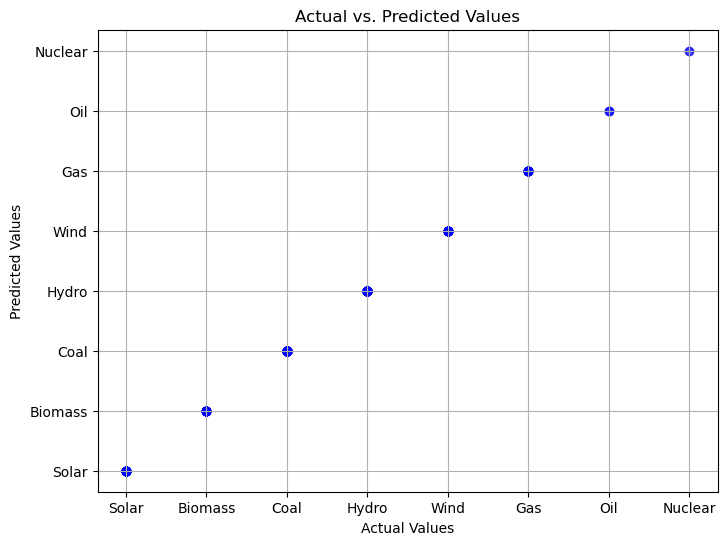

In [52]:
# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(results['Actual'], results['Predicted'], color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

The fit line is straight which indicates the best fit for the accuracy of its prediction

# Prediction  of capacity_mw 

In [54]:
df1.head()

,capacity_mw,latitude,longitude,primary_fuel
0,2.5,28.1839,73.2407,Solar
1,98.0,24.7663,74.6090,Coal
2,39.2,21.9038,69.3732,Wind
3,135.0,23.8712,91.3602,Gas
4,1800.0,21.9603,82.4091,Coal


In [55]:
X = df1.drop(['capacity_mw', 'primary_fuel'], axis=1)
Y = df1.capacity_mw

In [56]:
X

,latitude,longitude
0,28.1839,73.2407
1,24.7663,74.6090
2,21.9038,69.3732
3,23.8712,91.3602
4,21.9603,82.4091
...,...,...
902,16.2949,77.3568
903,12.8932,78.1654
904,15.2758,75.5811
905,24.3500,73.7477


In [57]:
Y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 907, dtype: float64

In [58]:
# spliting the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, Y_test.shape)

(907, 2) (725, 2) (182,)


In [111]:
#Training of the LinearRegression model for the predictions
#Loading the regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

Model Evaluation

In [112]:
lr.fit(X_train, Y_train)

LinearRegression()

In [113]:
#prediction based on training data
train_data_pred = lr.predict(X_train)

In [62]:
# determine R-square value
r2_train = metrics.r2_score(Y_train, train_data_pred)
print('R Squared :', r2_train) 

R Squared : 0.03931262977552952


In [114]:
# Make predictions on the test data
y_pred = lr.predict(X_test)

In [115]:
# Calculate evaluation metrics
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

# Print metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 307151.5517960723
Mean Absolute Error (MAE): 383.60360164989237


In [ ]:
#checking the prediction with original value
a = np.array(Y_test)
df1 = pd.DataFrame()
df1["Predicted"] =  dtr.predict(X_test)
df1["Original"] = a
df1

In [64]:
# Create a Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=5)

In [65]:
# Fit the model on the training data
dtr.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5)

In [66]:
#prediction based on training data
train_data_pred2 = dtr.predict(X_train)

In [67]:
# determine R-square value
r2_train = metrics.r2_score(Y_train, train_data_pred2)
print('R Squared :', r2_train) 

R Squared : 0.45506917816019277


In [99]:
# Make predictions on the test data
y_pred2 = dtr.predict(X_test)

In [100]:
# Calculate evaluation metrics
mse = mean_squared_error(Y_test, y_pred2)
mae = mean_absolute_error(Y_test, y_pred2)

# Print metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 402722.03433743626
Mean Absolute Error (MAE): 386.0836201067107


In [69]:
# Create a RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100)

In [70]:
# Fit the model on the training data
RFR.fit(X_train, Y_train)

RandomForestRegressor()

In [72]:
#prediction based on training data
train_data_pred3 = RFR.predict(X_train)

In [73]:
# determine R-square value
r2_train = metrics.r2_score(Y_train, train_data_pred3)
print('R Squared :', r2_train) 

R Squared : 0.8782475285576461


In [96]:
# Make predictions on the test data
y_pred3 = RFR.predict(X_test)

In [97]:
# Calculate evaluation metrics
mse = mean_squared_error(Y_test, y_pred3)
mae = mean_absolute_error(Y_test, y_pred3)

# Print metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 280316.9716015387
Mean Absolute Error (MAE): 321.2400669816856


In [74]:
#checking the prediction with original value
a = np.array(Y_test)
df1 = pd.DataFrame()
df1["Predicted"] =  RFR.predict(X_test)
df1["Original"] = a
df1

,Predicted,Original
0,704.591667,540.0
1,522.134000,330.0
2,5.000000,5.0
3,87.826200,75.0
4,283.788000,1050.0
...,...,...
177,377.325500,25.0
178,903.131600,94.8
179,286.016420,180.0
180,62.330693,28.0


In [77]:
# Create a XGBRegressor
from xgboost import XGBRegressor
# Create an XGBoost Regression model
XGBR = XGBRegressor(n_estimators=100)

In [78]:
# Fit the model on the training data
XGBR.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [80]:
#prediction based on training data
train_data_pred4 = XGBR.predict(X_train)

In [81]:
# determine R-square value
r2_train = metrics.r2_score(Y_train, train_data_pred4)
print('R Squared :', r2_train) 

R Squared : 0.9719737384581074


In [105]:
# Make predictions on the test data
y_pred4 = XGBR.predict(X_test)

In [106]:
# Calculate evaluation metrics
mse = mean_squared_error(Y_test, y_pred4)
mae = mean_absolute_error(Y_test, y_pred4)

# Print metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 421019.2003627518
Mean Absolute Error (MAE): 386.1101933545805


In [83]:
# Create a Support Vector Regression (SVR)
from sklearn.svm import SVR
SVR = SVR(kernel='linear', C=1.0)

In [84]:
# Fit the model on the training data
SVR.fit(X_train, Y_train)

SVR(kernel='linear')

In [87]:
#prediction based on training data
train_data_pred5 = SVR.predict(X_train)

In [88]:
# determine R-square value
r2_train = metrics.r2_score(Y_train, train_data_pred5)
print('R Squared :', r2_train) 

R Squared : -0.1423539600962207


In [103]:
# Make predictions on the test data
y_pred5 = SVR.predict(X_test)

In [104]:
# Calculate evaluation metrics
mse = mean_squared_error(Y_test, y_pred5)
mae = mean_absolute_error(Y_test, y_pred5)

# Print metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 389200.5949681751
Mean Absolute Error (MAE): 327.8812280523057


In [121]:
# Replace these values with the actual MSE and MAE values for each model
mse_lr = 307151.55
mae_lr = 383.60

mse_dct = 402722.03
mae_dct = 386.08

mse_rf = 280316.97
mae_rf = 321.24

mse_xgboost = 421019.20
mae_xgboost = 386.11

mse_svr = 389200.59
mae_svr = 327.88

In [123]:
# Create a DataFrame to store the results of different models
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVR',],
    'MSE': [mse_lr,mse_dct, mse_rf, mse_xgboost, mse_svr],
    'MAE': [mae_lr, mae_dct, mae_rf, mae_xgboost, mae_svr]
})

# Print the results
print(results)

               Model        MSE     MAE
0  Linear Regression  307151.55  383.60
1      Decision Tree  402722.03  386.08
2      Random Forest  280316.97  321.24
3            XGBoost  421019.20  386.11
4                SVR  389200.59  327.88


Comments:
Mean Squared Error (MSE):
MSE is a measure of the average squared difference between the predicted values and the actual (ground truth) values.
It penalizes larger errors more heavily because it squares the differences.
A lower MSE indicates a better fit of the model to the data.

Mean Absolute Error (MAE):
MAE is a measure of the average absolute difference between the predicted values and the actual values.
It treats all errors with equal weight and does not penalize larger errors more heavily, making it more robust to outliers.
A lower MAE indicates a better fit of the model to the data.

In summary, Random Forest regressor has MSE of 280316.97 and MAE of 321.24 which are lowest to other regressor for the model. it suggests that the model is performing well in terms of minimizing the absolute errors.

# Conclusion

It can be concluded that the analysis is able to predict the Primary Fuel and capacity_mw by both decistion tree classifier and Random Forest regressor respectively.